In [3]:
%autoreload 2 
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from astroML.plotting import hist

In [5]:
from DataScienceToolBox import preprocessing as prep

In [6]:
import preprocess_data as prepData

In [7]:
dataPath1 = "/Users/karenyng/Documents/Research/code/" + \
    "RadioRelicData/MACSJ1752/"
dataPath2 = "./../../Data/Subaru_data/"

In [143]:
spec_df = pd.read_csv(dataPath1 + "macs1752_1_2_3_4.csv")

In [142]:
sources_df = pd.read_hdf(dataPath2 + "combined_cat.h5",
          "preprocess_df")

In [11]:
brightstar_wcs = (268.06539916992188, 44.668739318847656)

## begin preprocessing

replace non-sensical values with `nan`

In [144]:
spec_df.replace(-99.0, np.nan, inplace=True)
spec_df["ra_obj"].replace(139037, np.nan, inplace=True)

# get stars

In [146]:
stars_mask = spec_df.quality == -1

In [150]:
star_df = spec_df[stars_mask]

In [151]:
star_df

,maskname,slit,which_trace,y_trace,ra_trace,dec_trace,objid,ra_obj,dec_obj,matchdelta,mag,z,zerr,quality,comment
3,mc171B,8,primary,22.1,267.915734,44.59024,530869598,267.915824,44.59039,0.60,23.6,-0.000701,0.000050,-1,star
17,mc171B,21,primary,30.8,267.959812,44.62257,530934335,267.959902,44.62271,0.57,21.7,-0.000164,0.000031,-1,"Ha ab, NaD"
46,mc171B,52,primary,8.0,267.880121,44.57667,530869561,267.880159,44.57672,0.22,24.0,-0.000328,0.000026,-1,star
59,mc171B,65,primary,22.9,268.186387,44.74017,775376926,268.186480,44.74032,0.61,22.0,0.001721,0.000068,-1,"bcol!, offser @ y=4 -- z=0.36788, q=3, Mgb, Gband"
104,mc171B,113,primary,32.0,268.122050,44.72917,775311717,268.122152,44.72934,0.66,22.6,-0.000170,0.000013,-1,star
122,mc171B,132,primary,32.1,268.172574,44.72072,775377824,268.172687,44.72091,0.75,23.0,0.012381,0.000020,-1,"Ha em, NII, marg SII"
137,mc171B,149,primary,8.2,268.052627,44.68590,NaN,NaN,NaN,NaN,NaN,-0.002759,0.000100,-1,"bext, bcol"
142,mc171B,154,primary,10.8,268.036645,44.66571,NaN,NaN,NaN,NaN,NaN,-0.000167,0.000002,-1,bext
144,mc172A,6,primary,15.9,267.953406,44.64548,530933637,267.953480,44.64549,0.19,22.5,-0.000879,0.000049,-1,"bcol!, br,"
159,mc172A,22,primary,59.0,267.983410,44.60688,530935083,267.983803,44.60693,1.02,23.2,0.000005,0.000020,-1,star


## we do have objects from all 4 masks

In [13]:
spec_df.maskname.unique()  

array(['mc171B', 'mc172A', 'macs3A', 'macs4A'], dtype=object)

# 1. only want objects with secure redshifts


0

In [14]:
np.sum(spec_df["quality"] == 4)

357

In [15]:
np.sum(spec_df["quality"] == 3)

40

In [16]:
accepted_cat = {"quality": [3, 4]}

In [17]:
mask = prep.process_cuts(spec_df, accept_cat=accepted_cat,
                         verbose=True)

obs only accepting quality == [3, 4] is 397, 82.88% remaining
No of accepted entries after all cuts = 397,    82.88%


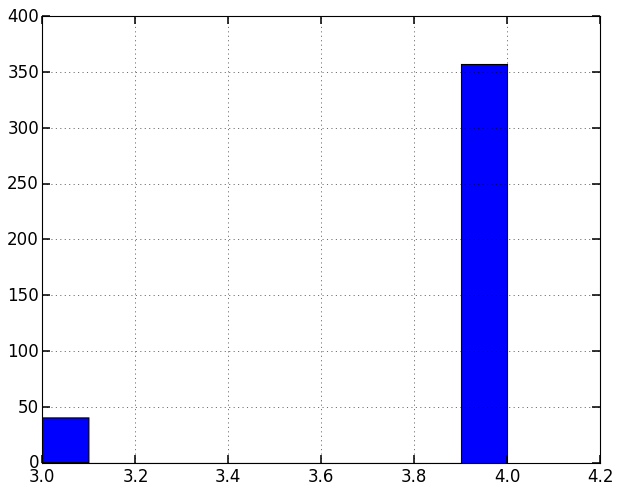

In [18]:
spec_df[mask].quality.hist()

In [19]:
spec_df = spec_df[mask]

In [20]:
spec_df.shape[0]

397

In [21]:
sources_df.shape[0]

42735

In [22]:
sourceRA = np.array(sources_df.RA)
sourceDEC = np.array(sources_df.DEC)

# Check matching between DEIMOS / Subaru coordinates

In [64]:
subaru_DEIMOS_dist, subaru_DEIMOS_indxes = \
    prepData.match_catalog(sources_df.Rband_X_WORLD, 
                           sources_df.Rband_Y_WORLD,
    # prepData.match_catalog(sources_df.RA, sources_df.DEC,
                           spec_df.ra_trace, spec_df.dec_trace)
subaru_DEIMOS_dist *= 60 * 60

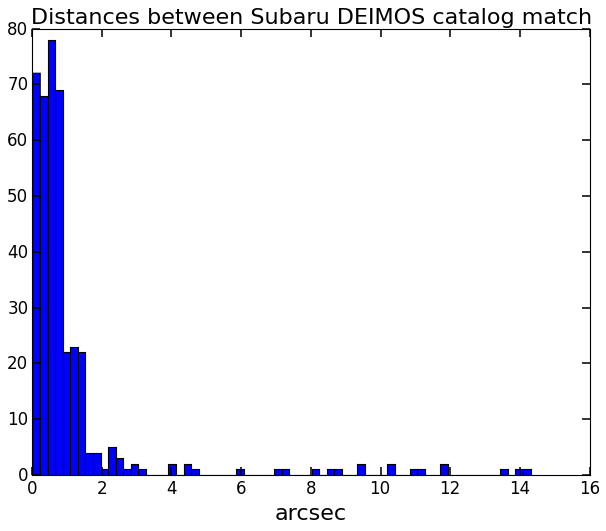

In [65]:
_ = hist(subaru_DEIMOS_dist, range=(0, 20), bins='knuth')
plt.xlabel("arcsec")
plt.title("Distances between Subaru DEIMOS catalog match")


We matched the catalog but some of the matches are way off,
we throw away "matches" that are > 5 arcsec

## Better matches with Subaru / SDSS data

find nans and use Subaru-DEIMOS data instead 

In [100]:
mask_nan = np.logical_or(np.isnan(spec_df.ra_obj), 
                         np.isnan(spec_df.dec_obj))
mask_nan = ~mask_nan

In [101]:
subaru_sdss_dist, subaru_sdss_indxes = \
    prepData.match_catalog(sources_df.Rband_X_WORLD, 
                           sources_df.Rband_Y_WORLD,
                           spec_df.ra_obj[mask_nan], 
                           spec_df.dec_obj[mask_nan])
# convert dist to arcsec
subaru_sdss_dist = np.abs(subaru_sdss_dist * 60 * 60)

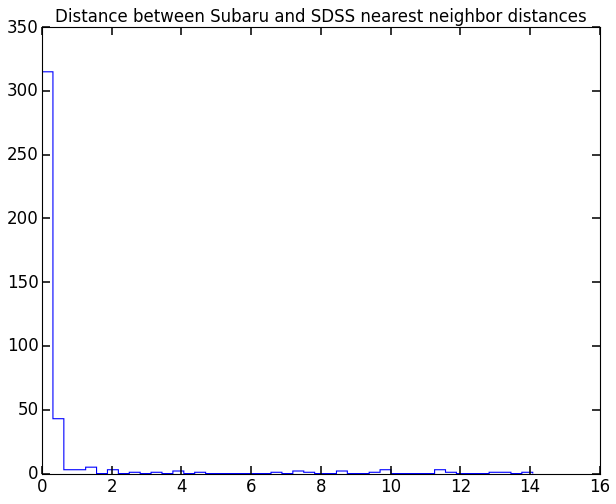

In [102]:
_ = hist(subaru_sdss_dist, range=(0, 20), bins='knuth',
         histtype='step')
plt.title("Distance between Subaru and SDSS nearest neighbor distances",
          fontsize=15)

In [106]:
no_match = np.logical_and(np.isfinite(subaru_sdss_dist),
                          subaru_sdss_dist > 2)

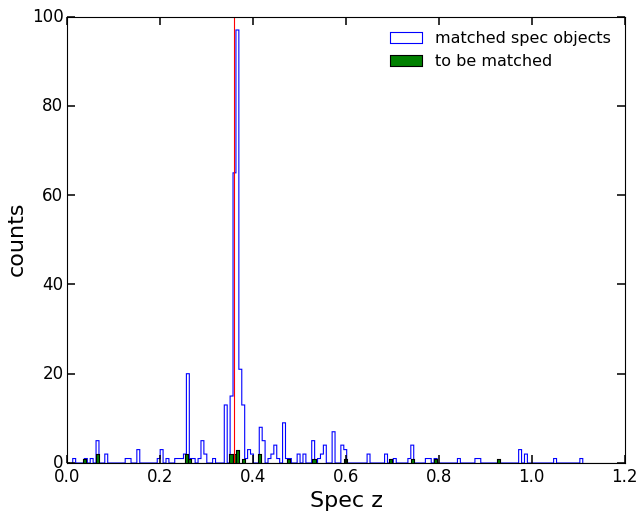

In [107]:
histbin = hist(np.array(spec_df["z"][deimos_match_mask]), 
               bins='knuth', histtype='step', color='b',
               label='matched spec objects')
bins = len(histbin[0])

xlim = plt.xlim()
_ = plt.hist(np.array(spec_df["z"][not_match_mask]), 
             bins=bins, color='g',
             label='to be matched', range=xlim)

plt.axvline(0.36, color='r')
#plt.ylabel('counts')
plt.xlabel("Spec z")
plt.legend(loc='best')
plt.ylabel("counts")

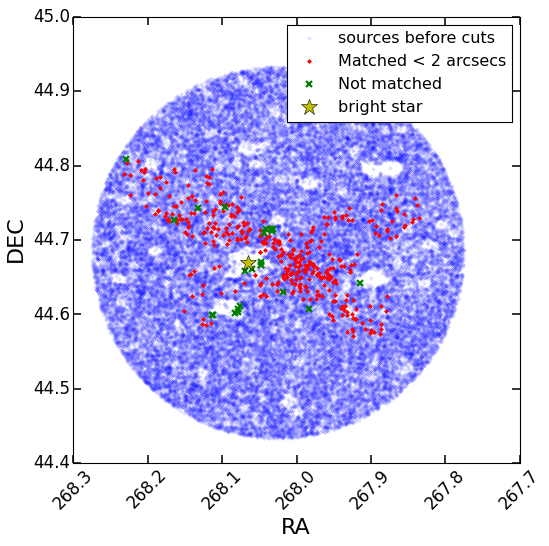

In [108]:
plt.axes().set_aspect('equal')
plt.plot(sources_df.Rband_X_WORLD, 
         sources_df.Rband_Y_WORLD, '.', 
         alpha=0.1, label="sources before cuts")
plt.plot(spec_df["ra_obj"][deimos_match_mask],
         spec_df["dec_obj"][deimos_match_mask],
         'r.', label="Matched < 2 arcsecs")
plt.plot(spec_df["ra_obj"][not_match_mask],
         spec_df["dec_obj"][not_match_mask],
         'gx', label="Not matched", mew=2)

plt.xlim(plt.xlim()[::-1])
xticks = plt.xticks()
plt.xticks(xticks[0], [str(t) for t in xticks[0]],
           rotation=45)

plt.plot(brightstar_wcs[0],
         brightstar_wcs[1],
         "y*", ms=15, label="bright star")

plt.xlabel("RA")
plt.ylabel("DEC")

plt.legend(loc='best', frameon=True)

## See if we have better luck matching the DEIMOS data

In [114]:
subaru_DEIMOS_dist2, subaru_DEIMOS_indxes2 = \
    prepData.match_catalog(sources_df.Rband_X_WORLD, 
                           sources_df.Rband_Y_WORLD,
                           spec_df.ra_trace[not_match_mask], 
                           spec_df.dec_trace[not_match_mask])
subaru_DEIMOS_dist2 *= 60 * 60

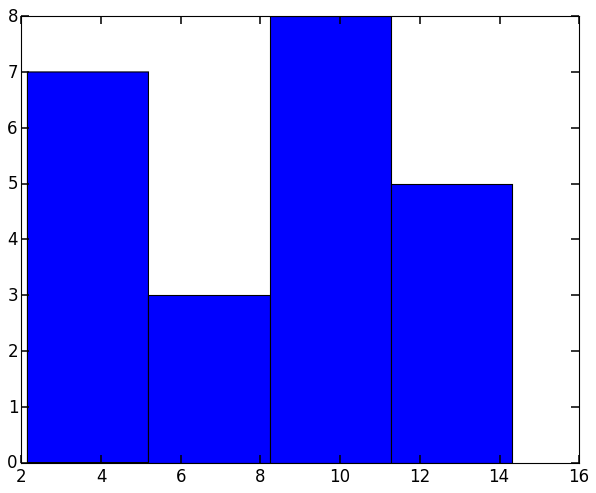

In [115]:
_ = hist(subaru_DEIMOS_dist2, bins='knuth')

In [117]:
subaru_DEIMOS_dist3, subaru_DEIMOS_indxes3 = \
    prepData.match_catalog(sources_df.Rband_X_WORLD, 
                           sources_df.Rband_Y_WORLD,
                           spec_df.ra_trace[~mask_nan], 
                           spec_df.dec_trace[~mask_nan])
subaru_DEIMOS_dist3 *= 60 * 60

In [119]:
subaru_DEIMOS_dist3

array([ 8.1513843 ,  4.67707637,  1.32282329])

In [120]:
specz = np.array([np.nan for i in range(sources_df.shape[0])])

In [121]:
specz[subaru_sdss_indxes] = spec_df[mask_nan].z

In [135]:
specz[subaru_DEIMOS_indxes3[-1]] = \
    spec_df["z"][spec_df[~mask_nan].index[-1]]

In [136]:
sources_df["specz"] = specz

In [137]:
sources_df.to_hdf(dataPath2 + "combined_cat.h5", "preprocess_df")

In [138]:
sources_df["specz"].describe()

count    381.000000
mean       0.398824
std        0.158627
min        0.012698
25%        0.358753
50%        0.366424
75%        0.396789
max        1.109547
Name: specz, dtype: float64

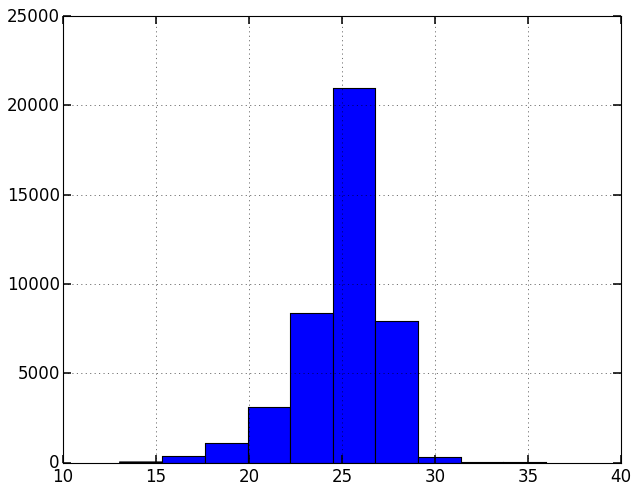

In [155]:
sources_df.Iband_MAG_ISO.hist()

In [159]:
spec_members = np.logical_and(sources_df.specz > 0.34,
                              sources_df.specz < 0.38)

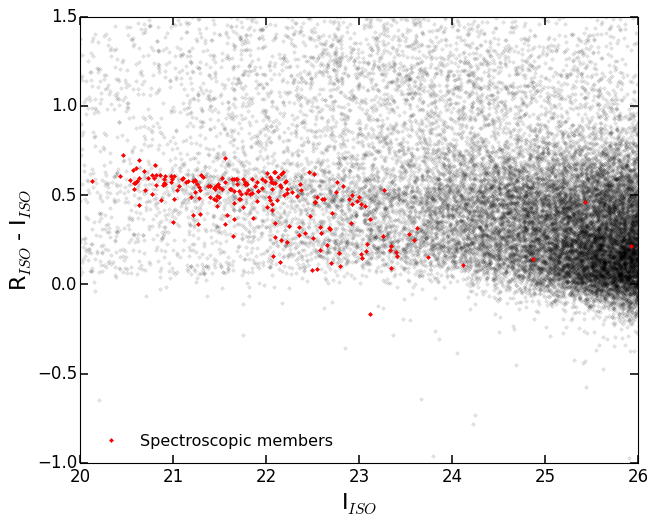

In [176]:
plt.plot(sources_df.Iband_MAG_APER,
         sources_df.Rband_MAG_APER-sources_df.Iband_MAG_APER, 
         'k.', alpha=0.1)
plt.plot(sources_df.Iband_MAG_APER[spec_members],
         sources_df.Rband_MAG_APER[spec_members] - 
         sources_df.Iband_MAG_APER[spec_members], 
         'r.', label='Spectroscopic members')
#plt.plot(star_df.Iband_MAG_APER, 
#         star_df.Rband_MAG_APER - 
#         star_df.Iband_MAG_APER)
plt.xlim(20, 26)
plt.ylim(-1, 1.5)
plt.ylabel(r"R$_{ISO}$ - I$_{ISO}$")
plt.xlabel(r"I$_{ISO}$")
plt.legend(loc='best')